#  RED WINE QUALITY MODEL

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
### checking quality unique values
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:>

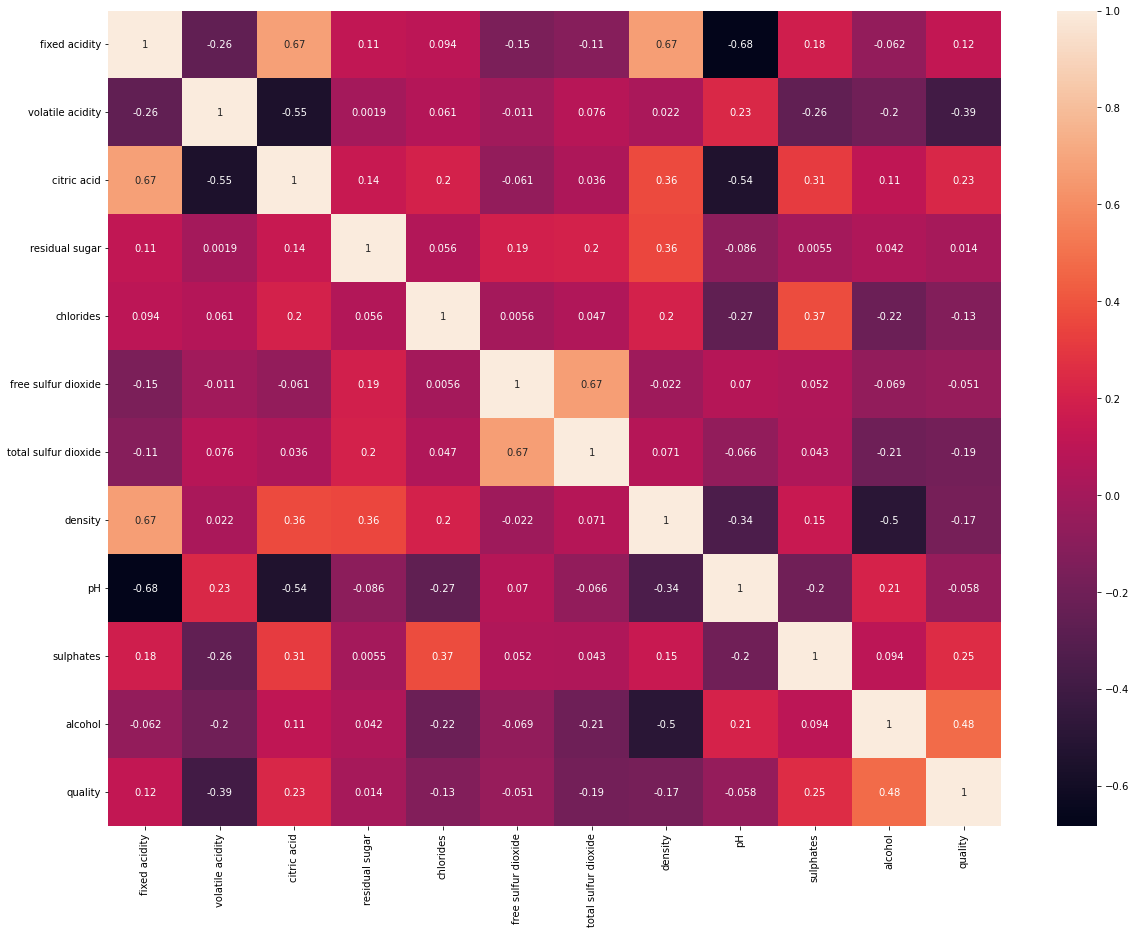

In [11]:
### cheching correlation 

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [13]:
###checking the cofficient of correlation with target column:-

df.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

as we see 7 columns havve less correlation with target column less than .01

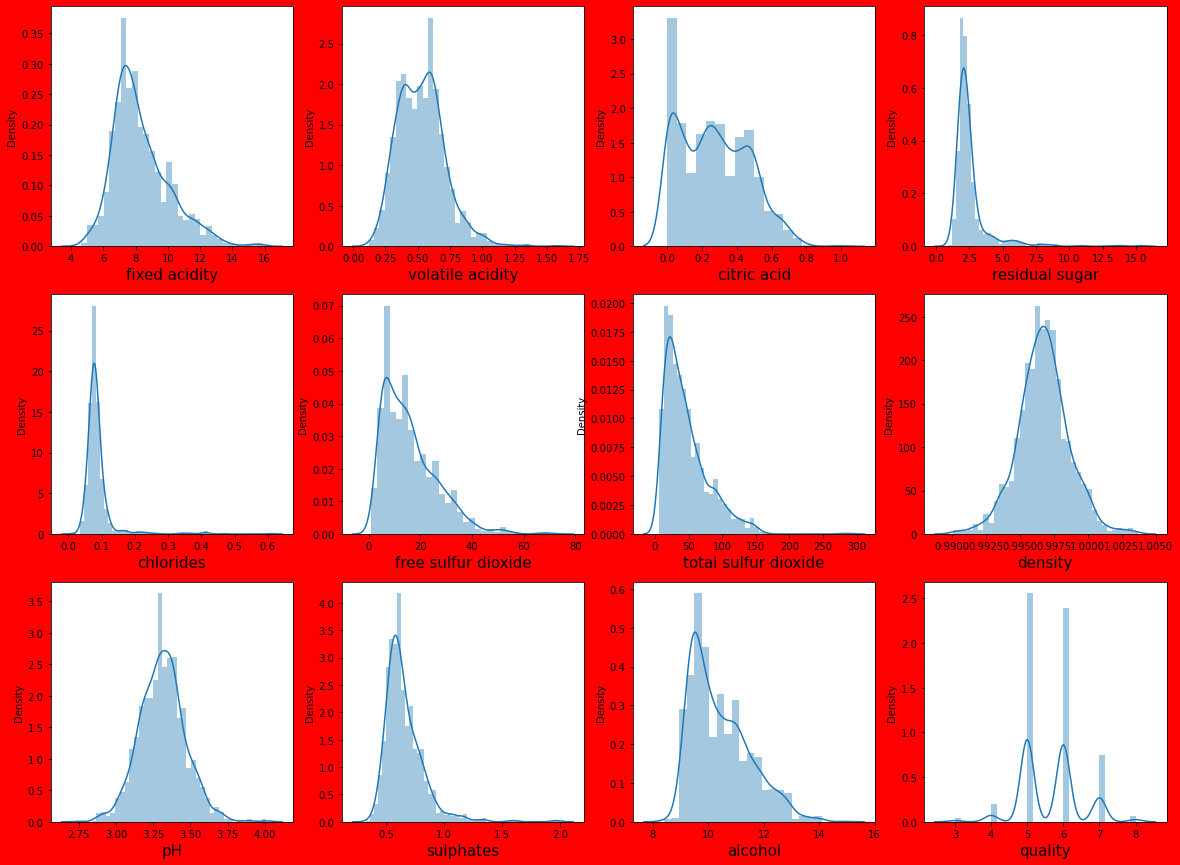

In [14]:
#now checking the distribution of data with  in columns:-
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in df :
    if plotnumber <= 12:
        ax= plt.subplot(3,4 ,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber += 1 
plt.show()


we can see almost every column has skewness ,so will remove skewness

In [18]:
#first make a binary classifier 
bins = (2,6.5,8)
quality_names = [ 'good','bad']
df['quality'] = pd.cut(df['quality'],bins=bins,labels =quality_names)

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


In [21]:
#now encoding quality as continues data:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [24]:
df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

In [25]:
le.inverse_transform([1,0])

array(['good', 'bad'], dtype=object)

In [26]:
#checking skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -2.129363
dtype: float64

since quality is label, so we can ignore skewness  for column. As we can see most of columns have skewness specially in residual sugar  and chlorides have high skewness

In [27]:
#Applying power transform to remove skewness
from sklearn.preprocessing import power_transform
x_new = power_transform(df)
x = pd.DataFrame(x_new,columns=df.columns)

In [28]:
## again checking a skewness after applying a power transform
x.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
quality                -2.129363
dtype: float64

so we can see except label column,all columns are in +/- 0.5range

<function matplotlib.pyplot.show(close=None, block=None)>

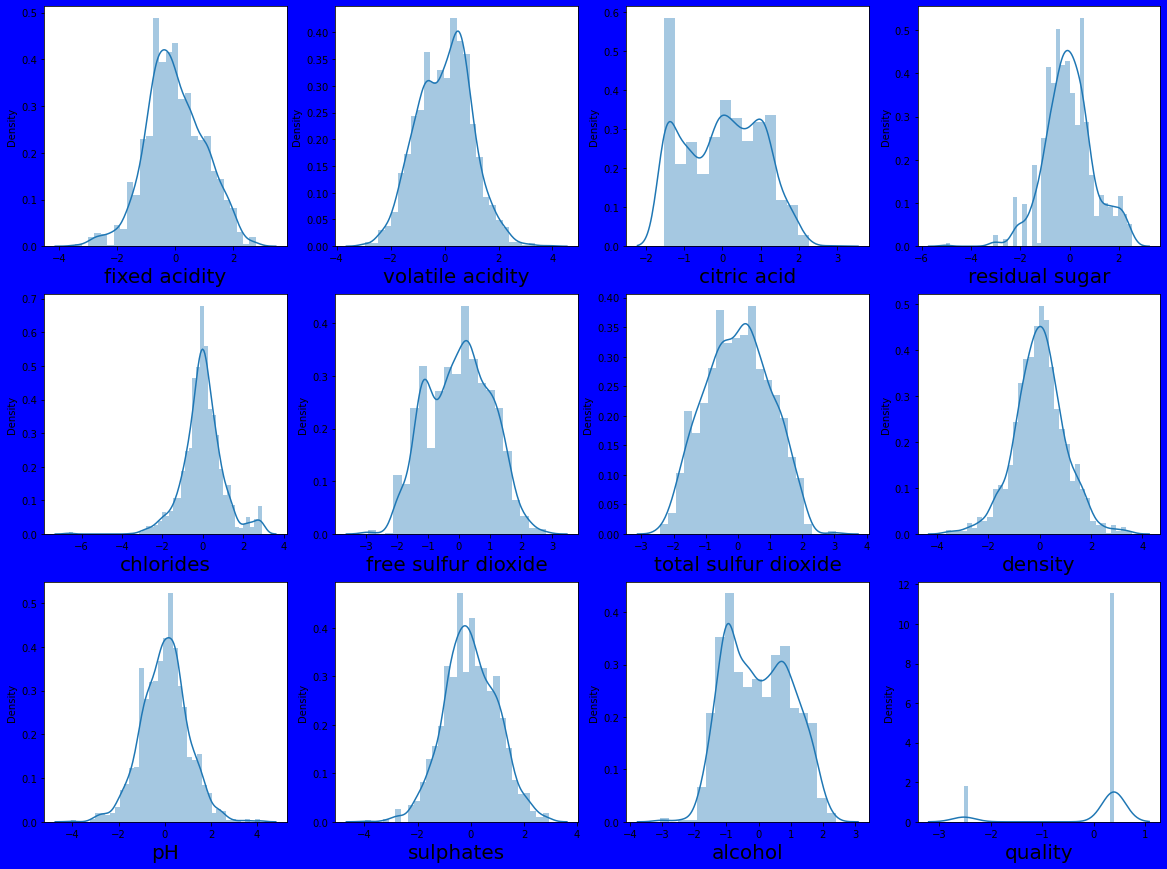

In [29]:
# after removing skewness now check distribution by using visulization
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber = 1
for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show    

<function matplotlib.pyplot.show(close=None, block=None)>

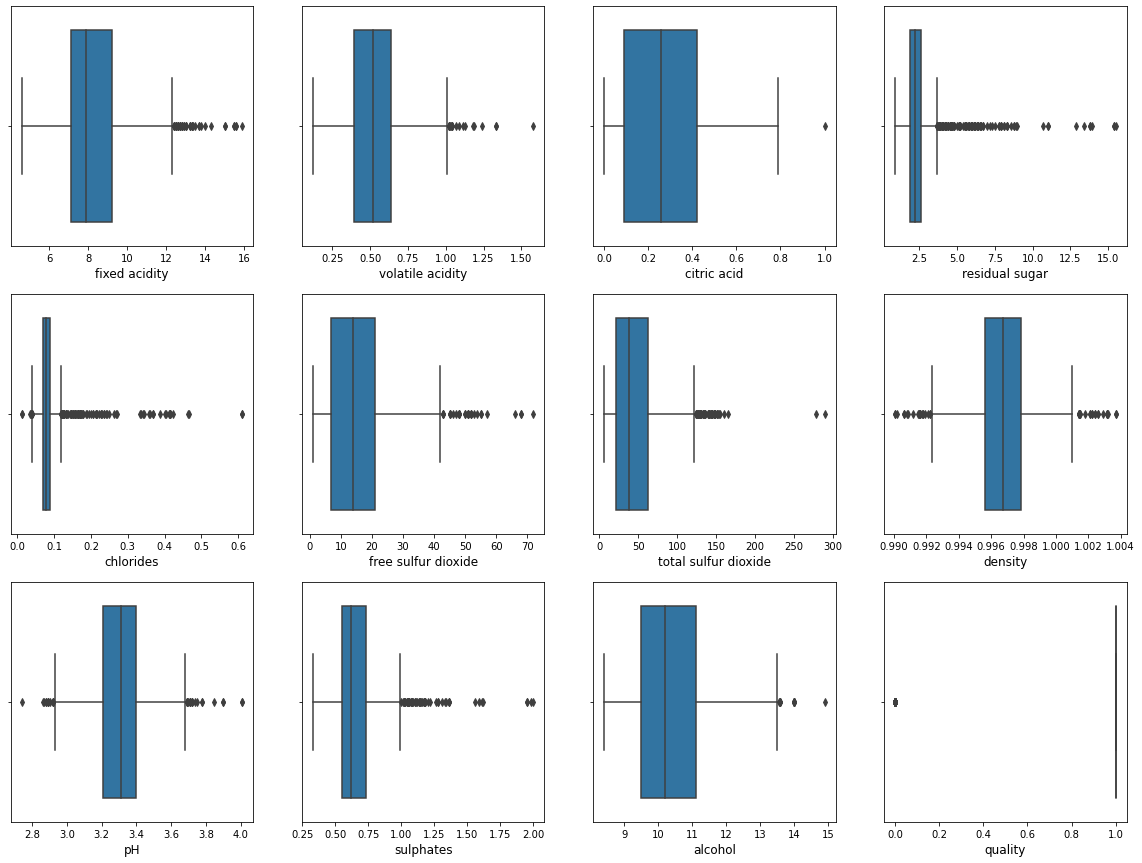

In [34]:
# now visulize outliner using boxplot
plt.figure(figsize=(20,15))
plotnumber = 1
for column in x:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=12)
    plotnumber += 1
plt.show    

In [36]:
## now removing outliear using zscore
from scipy.stats import zscore
z_score = zscore(df[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density'
                    ,'pH','sulphates']])
abs_zscore=np.abs(z_score)
new_data = (abs_zscore <3).all(axis=1)
df = df[new_data]
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000
mean,8.299255,0.523509,0.263997,2.394546,0.081564,15.424119,44.070461,0.996701,3.317507,0.643178,10.429709,0.861111
std,1.653296,0.169551,0.191340,0.871204,0.021475,9.879357,29.651377,0.001738,0.142229,0.130163,1.041354,0.345948
min,4.900000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.320000,0.620000,10.200000,1.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.720000,11.100000,1.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,57.000000,145.000000,1.002200,3.750000,1.160000,14.000000,1.000000


In [37]:
df.shape

(1476, 12)

now see how much data we have loss:



In [38]:
loss_percent = ((1599-1476)/1599*100)
loss_percent

7.6923076923076925

In [39]:
#### seprating featurs and label
x = df.drop('quality',axis=1)
y = df['quality']

In [40]:
scaler = StandardScaler()
x_scaler=scaler.fit_transform(x)


In [41]:
x_scaler.shape

(1476, 11)

In [44]:
##### now finding best random state
maxAcc = 0
maxrs= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    lgr = LogisticRegression()
    lgr.fit(x_train,y_train)
    pred_test=lgr.predict(x_test)
    acc= accuracy_score(y_test,pred_test)
    
    if acc >maxAcc:
        maxAcc=acc
        maxrs=i
print('Best accuracy is:',maxAcc,'at random state',maxrs)        

Best accuracy is: 0.9159891598915989 at random state 57


In [45]:
### train test####
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=57)

In [46]:
x_train.shape

(1107, 11)

In [47]:
y_train.shape

(1107,)

In [48]:
x_test.shape

(369, 11)

In [49]:
y_test.shape

(369,)

In [52]:
##logisticregression ###
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
pred_lgr=lgr.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,pred_lgr))
print(confusion_matrix(y_test,pred_lgr))
print(classification_report(y_test,pred_lgr))

Accuracy score : 0.9159891598915989
[[ 13  24]
 [  7 325]]
              precision    recall  f1-score   support

           0       0.65      0.35      0.46        37
           1       0.93      0.98      0.95       332

    accuracy                           0.92       369
   macro avg       0.79      0.67      0.71       369
weighted avg       0.90      0.92      0.90       369



In [56]:
####Decisiontreeclassifier######
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy score : 0.9024390243902439
[[ 25  12]
 [ 24 308]]
              precision    recall  f1-score   support

           0       0.51      0.68      0.58        37
           1       0.96      0.93      0.94       332

    accuracy                           0.90       369
   macro avg       0.74      0.80      0.76       369
weighted avg       0.92      0.90      0.91       369



In [59]:
#randomforestclassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy score: 0.9349593495934959
[[ 18  19]
 [  5 327]]
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        37
           1       0.95      0.98      0.96       332

    accuracy                           0.93       369
   macro avg       0.86      0.74      0.78       369
weighted avg       0.93      0.93      0.93       369



In [64]:
#kneighbors classifer
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,pred_kn))
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy score : 0.907859078590786
[[ 15  22]
 [ 12 320]]
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        37
           1       0.94      0.96      0.95       332

    accuracy                           0.91       369
   macro avg       0.75      0.68      0.71       369
weighted avg       0.90      0.91      0.90       369



In [67]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy score : 0.9159891598915989
[[ 10  27]
 [  4 328]]
              precision    recall  f1-score   support

           0       0.71      0.27      0.39        37
           1       0.92      0.99      0.95       332

    accuracy                           0.92       369
   macro avg       0.82      0.63      0.67       369
weighted avg       0.90      0.92      0.90       369



In [68]:
###### corss vailidation ##########
cvs = cross_val_score(lgr,x_scaler,y,cv=5)
print("Cross Validation of LOgistic Regression model ",cvs.mean())


Cross Validation of LOgistic Regression model  0.8678905176362803


In [72]:
cvs1 = cross_val_score(dt,x_scaler,y,cv=5)
print("Cross Validation of DecisionTreeClassifier model ",cvs.mean())

Cross Validation of DecisionTreeClassifier model  0.8475492441594137


In [73]:
cvs2 = cross_val_score(rf,x_scaler,y,cv=5)
print("Cross Validation of RandomfroestClassifier model",cvs.mean())

Cross Validation of RandomfroestClassifier model 0.8475492441594137


In [74]:
cvs3 = cross_val_score(kn,x_scaler,y,cv=5)
print("Cross Validation of Kneightbors classifier",cvs.mean())

Cross Validation of Kneightbors classifier 0.8475492441594137


In [75]:
cvs4 = cross_val_score(svc,x_scaler,y,cv=5)
print("Cross Validation of SVC classifier model",cvs.mean())

Cross Validation of SVC classifier model 0.8475492441594137


In [79]:
####hyperparameter tuning######
SVC()
param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
gcv = GridSearchCV(SVC(),param_grid)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [80]:
#now with best parameter 
svc = SVC(C= 1000,gamma=0.001,kernel='rbf')
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print('Accuracy score:',accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy score: 0.9214092140921409
[[ 11  26]
 [  3 329]]
              precision    recall  f1-score   support

           0       0.79      0.30      0.43        37
           1       0.93      0.99      0.96       332

    accuracy                           0.92       369
   macro avg       0.86      0.64      0.69       369
weighted avg       0.91      0.92      0.91       369



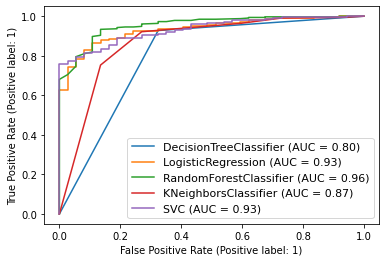

In [83]:
# ploting roc auc curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lgr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')
plt.show()

In [85]:
import pickle
filename = 'SVM_classification model.pickle'
pickle.dump(svc,open(filename,'wb'))